<a href="https://colab.research.google.com/github/prathameshk30/Georgia-Pacific-Data-Science-Project/blob/main/MMM_demo_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ! pip install pandoc

### To create a market mix model for ElecKart (an e-commerce firm based out of Ontario, Canada) for 3 product sub-categories - Camera Accessory, Gaming Accessory and Home Audio.

### To observe the actual impact of various marketing variables over one year (July 2015 to June 2016) and recommend the optimal budget allocation for different marketing levers for the next year.

## This demo is divided in two parts:-

### 1) Using regular Regression methods to build MMM model.

### 2) Use Facebook "Robyn" to develope a MMM model.

## First we define the business objective:-

### 1) Performance Driver Analysis - KPIs impacting the top-line performance

### 2) Impact Analysis on Marketing ROI - Quantitative impact of each channel on revenue

### 3) Optimizing Marketing Spends - Recommendation to allocate the marketing budget to gain the highest outcome

### Dataset is divided into two parts:-
### 1) Product information
### 2) Media Channel information

### Method 1:- Modelling using Regression

In [ ]:
# importing all the required python libraries & packages

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from datetime import date, datetime
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import sklearn
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
# Readng the Dataset

df = pd.read_csv(r"C:\Users\prath\Downloads\MMM_demo_new.csv")
df.head(5)

C:\Users\prath\AppData\Local\Temp\ipykernel_32272\755240022.py:3: DtypeWarning: Columns (7,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\prath\Downloads\MMM_demo_new.csv")


,Unnamed: 0,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,...,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,0,ACCCZ34CBVZJTVQF,2015-10-04 19:24:36,2015,10,1.408217e+15,1.408217e+15,3075,1,\N,...,COD,9,4.34477146699389E+018,-1.78050760490657E+018,CE,GamingHardware,GamingAccessory,GamePad,3999,5
1,1,ACCCZ34CBVZJTVQF,2015-10-14 22:54:54,2015,10,1.416985e+15,1.416985e+15,2750,1,\N,...,COD,7,9.04157730463172E+018,-5.1750058942027E+018,CE,GamingHardware,GamingAccessory,GamePad,3999,5
2,2,ACCCZ34CBVZJTVQF,2015-10-15 20:19:38,2015,10,1.417669e+15,1.417669e+15,2899,1,\N,...,Prepaid,5,8.97383112414031E+018,-7.07126047139944E+017,CE,GamingHardware,GamingAccessory,GamePad,3999,5
3,3,ACCCZ34CBVZJTVQF,2015-10-17 18:21:43,2015,10,1.419415e+15,1.419415e+15,2609,1,\N,...,Prepaid,5,-4.82414273647179E+018,6.40491320207757E+018,CE,GamingHardware,GamingAccessory,GamePad,3999,5
4,4,ACCCZ34CBVZJTVQF,2015-10-26 17:49:39,2015,10,1.427168e+15,1.427168e+15,2772,1,\N,...,Prepaid,5,-3.30536529726028E+018,2.08941992580576E+018,CE,GamingHardware,GamingAccessory,GamePad,3999,5


#### Dataset has entries with '\N' & whitespaces. Hence, replacing these values as Null/NaN.

In [ ]:
# Replace the "\N" & " " with NaN Values

df=df.replace(r'\\N', np.nan, regex=True).replace(r' ', np.nan)
df.head(5)

,Unnamed: 0,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,...,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,0,ACCCZ34CBVZJTVQF,2015-10-04 19:24:36,2015,10,1.408217e+15,1.408217e+15,3075,1,NaN,...,COD,9,4.34477146699389E+018,-1.78050760490657E+018,CE,GamingHardware,GamingAccessory,GamePad,3999,5
1,1,ACCCZ34CBVZJTVQF,2015-10-14 22:54:54,2015,10,1.416985e+15,1.416985e+15,2750,1,NaN,...,COD,7,9.04157730463172E+018,-5.1750058942027E+018,CE,GamingHardware,GamingAccessory,GamePad,3999,5
2,2,ACCCZ34CBVZJTVQF,2015-10-15 20:19:38,2015,10,1.417669e+15,1.417669e+15,2899,1,NaN,...,Prepaid,5,8.97383112414031E+018,-7.07126047139944E+017,CE,GamingHardware,GamingAccessory,GamePad,3999,5
3,3,ACCCZ34CBVZJTVQF,2015-10-17 18:21:43,2015,10,1.419415e+15,1.419415e+15,2609,1,NaN,...,Prepaid,5,-4.82414273647179E+018,6.40491320207757E+018,CE,GamingHardware,GamingAccessory,GamePad,3999,5
4,4,ACCCZ34CBVZJTVQF,2015-10-26 17:49:39,2015,10,1.427168e+15,1.427168e+15,2772,1,NaN,...,Prepaid,5,-3.30536529726028E+018,2.08941992580576E+018,CE,GamingHardware,GamingAccessory,GamePad,3999,5


In [ ]:
# Dropping all the columns which are of no use for modelling
df.drop(['fsn_id','order_item_id','pincode','product_analytic_super_category','product_analytic_category'], inplace = True, axis = 1)

In [ ]:
# Checking the size of dataset

df.shape

(566267, 16)

In [ ]:
# Checking the basic information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566267 entries, 0 to 566266
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     566267 non-null  int64  
 1   order_date                     566267 non-null  object 
 2   Year                           566267 non-null  int64  
 3   Month                          566267 non-null  int64  
 4   order_id                       566267 non-null  float64
 5   gmv                            564595 non-null  object 
 6   units                          566267 non-null  int64  
 7   deliverybdays                  117257 non-null  object 
 8   deliverycdays                  117257 non-null  object 
 9   s1_fact.order_payment_type     566267 non-null  object 
 10  sla                            566267 non-null  int64  
 11  cust_id                        564595 non-null  object 
 12  product_analytic_sub_category 

In [ ]:
# Checking the null values

df.isnull().sum()

Unnamed: 0                            0
order_date                            0
Year                                  0
Month                                 0
order_id                              0
gmv                                1672
units                                 0
deliverybdays                    449010
deliverycdays                    449010
s1_fact.order_payment_type            0
sla                                   0
cust_id                            1672
product_analytic_sub_category         0
product_analytic_vertical             0
product_mrp                           0
product_procurement_sla               0
dtype: int64

## 2) Data Preparation

In [ ]:
# Droping the columns with null values

df=df.drop(columns=['Unnamed: 0','deliverybdays','deliverycdays'])
df.head(5)

,order_date,Year,Month,order_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,2015-10-04 19:24:36,2015,10,1.408217e+15,3075,1,COD,9,4.34477146699389E+018,GamingAccessory,GamePad,3999,5
1,2015-10-14 22:54:54,2015,10,1.416985e+15,2750,1,COD,7,9.04157730463172E+018,GamingAccessory,GamePad,3999,5
2,2015-10-15 20:19:38,2015,10,1.417669e+15,2899,1,Prepaid,5,8.97383112414031E+018,GamingAccessory,GamePad,3999,5
3,2015-10-17 18:21:43,2015,10,1.419415e+15,2609,1,Prepaid,5,-4.82414273647179E+018,GamingAccessory,GamePad,3999,5
4,2015-10-26 17:49:39,2015,10,1.427168e+15,2772,1,Prepaid,5,-3.30536529726028E+018,GamingAccessory,GamePad,3999,5


As we check the null values, we see "base price", "cust_id" and "pincode" have null values. Therefore, instead of dropping the null values we will replace the "base price" with a imputation method using "KNN" algorithm and id columns with 0.

In [ ]:
df = df.rename(columns={'gmv': 'revenue', 'product_mrp': 'price'})

In [ ]:
# imputing the null values

df['cust_id']=df['cust_id'].fillna(0)

# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
# fit on the data
imputer.fit(df['revenue'].to_frame())

# transform the data
df['revenue'] = imputer.transform(df['revenue'].to_frame())

# checking for null values
df.isnull().sum()

order_date                       0
Year                             0
Month                            0
order_id                         0
revenue                          0
units                            0
s1_fact.order_payment_type       0
sla                              0
cust_id                          0
product_analytic_sub_category    0
product_analytic_vertical        0
price                            0
product_procurement_sla          0
dtype: int64

In [ ]:
# Lets find the percentage of unique orders for all sub categories by order_ID

unq_orders = len(df.drop_duplicates(subset = ["order_id"], keep = False))/len(df)*100
print("Percentage of unique orders for all the sub categories:", round(unq_orders,2))

Percentage of unique orders for all the sub categories: 81.96


##### Dropping duplicates entries from the dataset on basis of order_date, order_id, order_item_id and number of units

In [ ]:
df = df.drop_duplicates(subset = ["order_date", "order_id","units"], keep = 'first', inplace = False)
df.shape

(524953, 13)

In [ ]:
# Applying the necessary Data type conversion to fix the data format
df['order_datetime'] = pd.to_datetime(df['order_date'], format='%Y-%m-%d %H:%M:%S')

# Removing sceintific notation in the below columns
df['cust_id'] = df['cust_id'].apply(lambda x: '{:.0f}'.format(float(x)))
df['order_id'] = df['order_id'].apply(lambda x: '{:.0f}'.format(float(x)))

In [ ]:
# Creating the order_date column from order_datetime column
df['order_date'] = df['order_datetime'].dt.date

In MMM , it is necessary to fix a time window to model. Fixing a time frame of 1 year.

In [ ]:
# As per the inputs from business, filtering out the data for the dates which are lying beyond the scope of modelling i.e. July 2015 to June 2016
start_date = pd.to_datetime("2015-07-01").date()
end_date = pd.to_datetime("2016-06-30").date()
df = df.loc[(df['order_date']>=start_date) & (df['order_date']<=end_date)]
df.shape

(524755, 14)

In [ ]:
# As per the inputs from business, the modelling is to be done on weekly aggregated data. Hence, creating the order_week column
df['order_week'] = df['order_datetime'].dt.week

C:\Users\prath\AppData\Local\Temp\ipykernel_32272\2477579130.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['order_week'] = df['order_datetime'].dt.week


In [ ]:
# Checking the dataframe
df.head()

,order_date,Year,Month,order_id,revenue,units,s1_fact.order_payment_type,sla,cust_id,product_analytic_sub_category,product_analytic_vertical,price,product_procurement_sla,order_datetime,order_week
0,2015-10-04,2015,10,1408216975064600,3075.0,1,COD,9,4344771466993889792,GamingAccessory,GamePad,3999,5,2015-10-04 19:24:36,40
1,2015-10-14,2015,10,1416985339691600,2750.0,1,COD,7,9041577304631719936,GamingAccessory,GamePad,3999,5,2015-10-14 22:54:54,42
2,2015-10-15,2015,10,1417669228375400,2899.0,1,Prepaid,5,8973831124140309504,GamingAccessory,GamePad,3999,5,2015-10-15 20:19:38,42
3,2015-10-17,2015,10,1419414998353400,2609.0,1,Prepaid,5,-4824142736471789568,GamingAccessory,GamePad,3999,5,2015-10-17 18:21:43,42
4,2015-10-26,2015,10,1427167582532600,2772.0,1,Prepaid,5,-3305365297260279808,GamingAccessory,GamePad,3999,5,2015-10-26 17:49:39,44


In [ ]:
# Reviewing & updating the order_week data to make it continous
def ordWeek(order_week,year):
    if((year == 2016) & (order_week <= 26)):
         return order_week+53
    else:
        return order_week

df['order_week'] = df.apply(lambda x: ordWeek(x['order_week'],x['Year']), axis = 1)

In [ ]:
df.head()

,order_date,Year,Month,order_id,revenue,units,s1_fact.order_payment_type,sla,cust_id,product_analytic_sub_category,product_analytic_vertical,price,product_procurement_sla,order_datetime,order_week
0,2015-10-04,2015,10,1408216975064600,3075.0,1,COD,9,4344771466993889792,GamingAccessory,GamePad,3999,5,2015-10-04 19:24:36,40
1,2015-10-14,2015,10,1416985339691600,2750.0,1,COD,7,9041577304631719936,GamingAccessory,GamePad,3999,5,2015-10-14 22:54:54,42
2,2015-10-15,2015,10,1417669228375400,2899.0,1,Prepaid,5,8973831124140309504,GamingAccessory,GamePad,3999,5,2015-10-15 20:19:38,42
3,2015-10-17,2015,10,1419414998353400,2609.0,1,Prepaid,5,-4824142736471789568,GamingAccessory,GamePad,3999,5,2015-10-17 18:21:43,42
4,2015-10-26,2015,10,1427167582532600,2772.0,1,Prepaid,5,-3305365297260279808,GamingAccessory,GamePad,3999,5,2015-10-26 17:49:39,44


The main feature in a MMM dataset should be price. Therefore, checking

Outliers Treatment

In [ ]:
# Below are the numeric columns
df.describe()

,Year,Month,revenue,units,sla,price,product_procurement_sla,order_week
count,524755.000000,524755.000000,524755.000000,524755.000000,524755.000000,524755.000000,524755.000000,524755.000000
mean,2015.574619,6.240015,1281.652936,1.026100,5.887877,2467.803861,2.539282,55.795798
std,0.494401,3.675536,2430.175553,0.257189,2.696588,4668.095234,1.734727,13.537367
min,2015.000000,1.000000,0.000000,1.000000,0.000000,0.000000,-1.000000,27.000000
25%,2015.000000,3.000000,299.000000,1.000000,4.000000,700.000000,2.000000,45.000000
50%,2016.000000,6.000000,550.000000,1.000000,6.000000,1199.000000,2.000000,56.000000
75%,2016.000000,10.000000,1499.000000,1.000000,7.000000,2790.000000,3.000000,67.000000
max,2016.000000,12.000000,148050.000000,39.000000,60.000000,180000.000000,15.000000,79.000000


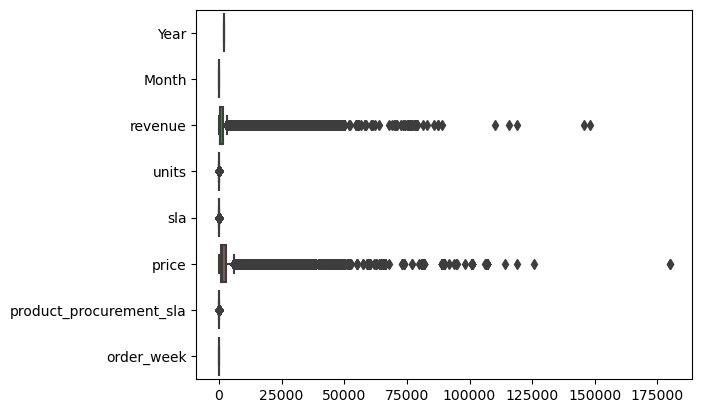

In [ ]:
# plotting box plot
# using the orient parameter for orientation of each numeric variable
sns.boxplot( data = df.select_dtypes(include=[np.number]), orient="h")

# display
plt.show()

Base price and price outliers can be cause shift in coefficent values of the regression model. Therefore, removing the values.

In [ ]:
df=df.drop(df[df['revenue'] > 20000].index)
df=df.drop(df[df['price'] > 40000].index)
df.shape

(521274, 15)

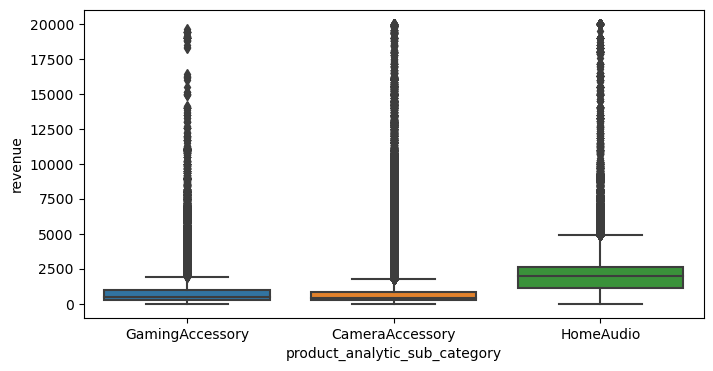

In [ ]:
# Further Outlier analysis for revenue for each of the category
plt.figure(figsize = (8,4))
sns.boxplot(y = 'revenue',data = df, x = 'product_analytic_sub_category')
plt.show()

In [ ]:
# Capping the base price values for each of the categories to 0.95 quantile
cam_q95 = df.loc[(df.product_analytic_sub_category=='CameraAccessory')]['revenue'].quantile(0.95)
gam_q95 = df.loc[(df.product_analytic_sub_category=='GamingAccessory')]['revenue'].quantile(0.95)
hom_q95 = df.loc[(df.product_analytic_sub_category=='HomeAudio')]['revenue'].quantile(0.95)

camera = df.loc[(df.product_analytic_sub_category=='CameraAccessory') & (df['revenue']<cam_q95)]
gaming = df.loc[(df.product_analytic_sub_category=='GamingAccessory') & (df['revenue']<gam_q95)]
homeaudio = df.loc[(df.product_analytic_sub_category=='HomeAudio') & (df['revenue']<gam_q95)]

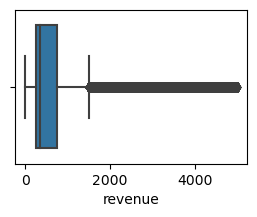

In [ ]:
# Checking again the Outliers for GMV for each of the category
# For CameraAccessory
plt.figure(figsize = (3,2))
sns.boxplot(x=camera['revenue'])
plt.show()

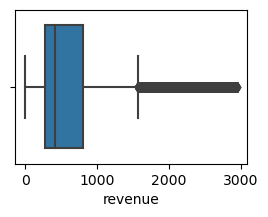

In [ ]:
# Checking again the Outliers for revenue for each of the category
# For gaming
plt.figure(figsize = (3,2))
sns.boxplot(x=gaming['revenue'])
plt.show()

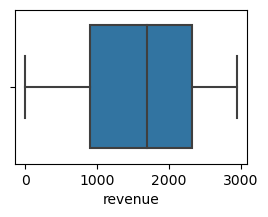

In [ ]:
# Checking again the Outliers for revenue for each of the category
# For home audio
plt.figure(figsize = (3,2))
sns.boxplot(x=homeaudio['revenue'])
plt.show()

In [ ]:
# Now, lets concat the three categoris to a single dataframe
df_products = pd.concat([camera, gaming, homeaudio], axis = 0)
df_products=df_products.reset_index(drop=True)
df_products.shape

(479671, 15)

In [ ]:
df_products.head()

,order_date,Year,Month,order_id,revenue,units,s1_fact.order_payment_type,sla,cust_id,product_analytic_sub_category,product_analytic_vertical,price,product_procurement_sla,order_datetime,order_week
0,2015-10-20,2015,10,2421912925714800,1990.0,1,COD,10,-1040442942046599936,CameraAccessory,CameraTripod,2099,3,2015-10-20 15:45:56,43
1,2015-10-14,2015,10,4416592101738400,1690.0,1,Prepaid,4,-7604960843527140352,CameraAccessory,CameraTripod,2099,3,2015-10-14 12:05:15,42
2,2015-10-17,2015,10,4419525153426400,1618.0,1,Prepaid,6,2894557208345299968,CameraAccessory,CameraTripod,2099,3,2015-10-17 21:25:03,42
3,2015-10-17,2015,10,3419188825145600,3324.0,1,Prepaid,5,-7641546361891739648,CameraAccessory,CameraTripod,4044,5,2015-10-17 12:07:24,42
4,2015-10-16,2015,10,3418428515041500,3695.0,1,Prepaid,6,-71561404148106600,CameraAccessory,CameraTripod,4044,5,2015-10-16 14:59:57,42


In [ ]:
# Converting the data type of week, month & year to integer

df_products['Year'] = df_products['Year'].astype('int')
df_products['Month'] = df_products['Month'].astype('int')
df_products['order_week'] = df_products['order_week'].astype('int')

## 3) Exploratory Data Analysis

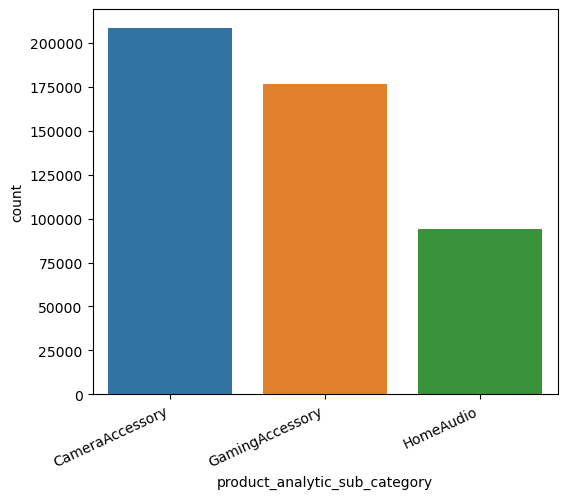

In [ ]:
# visualize the count of transaction across each category
plt.figure(figsize = (6,5))
ax = sns.countplot(x=df_products['product_analytic_sub_category'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right")
sns.set_context(font_scale = 3)

INSIGHTs:

From the above plot we can see that the maximum orders were placed for Camera Accessory followed by Gaming Accessory & then Home Audio

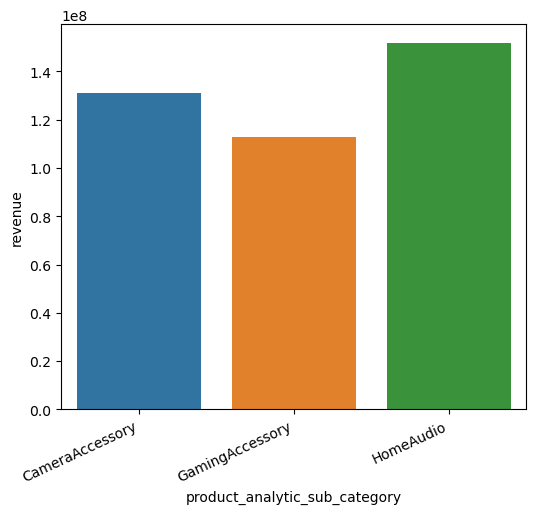

In [ ]:
# Plot to visualize the revenue across each category
total_revenue= df_products.groupby('product_analytic_sub_category')['revenue'].sum().reset_index()
plt.figure(figsize = (6,5))
ax = sns.barplot(x='product_analytic_sub_category', y='revenue', data=total_revenue)
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right")
sns.set_context(font_scale = 2.5)

INSIGHTs:

From the above plot, we can see that the highest revenue was received from Home Audio followed by Camera Accessory & then Gaming Accessory

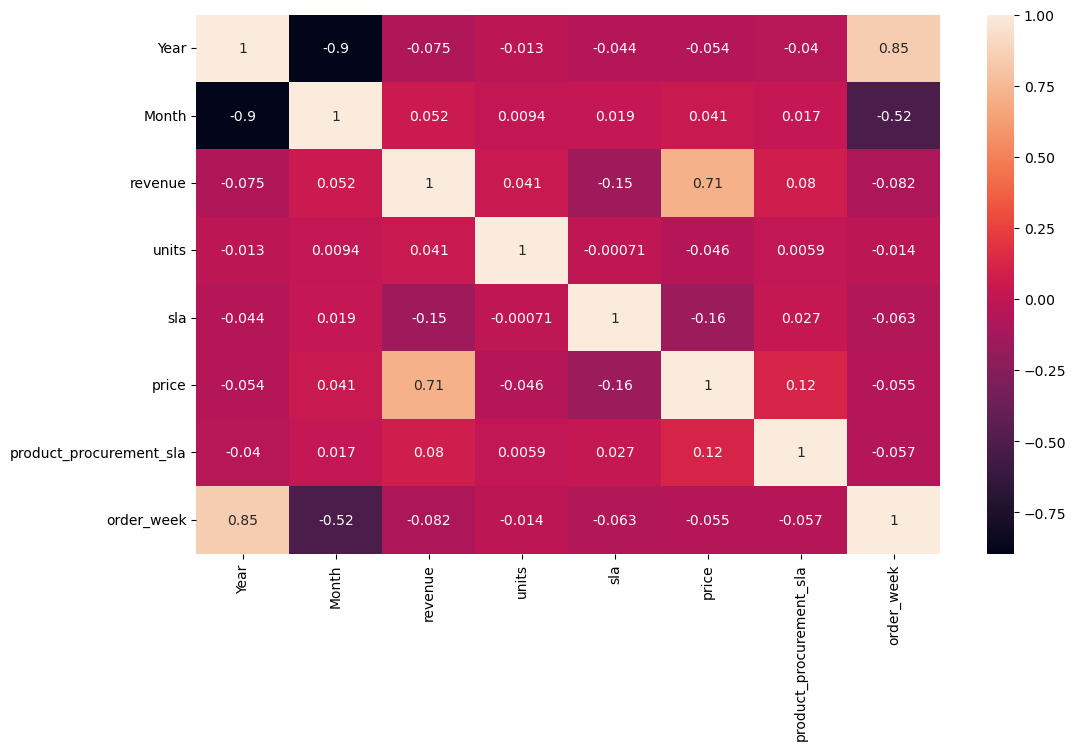

In [ ]:
# Lets look at the Correlation Matrix for all the numerical features
plt.figure(figsize = (12,7))
sns.heatmap(df_products.corr(), annot=True)
plt.show()

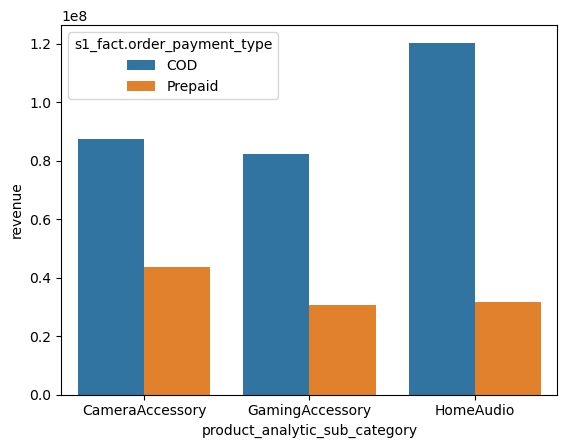

In [ ]:
# Plotting & analysing the revenue by payment type for each of the product category.
base_price_by_paymentType = df_products.groupby(["s1_fact.order_payment_type","product_analytic_sub_category"])['revenue'].sum().reset_index()
sns.barplot(x='product_analytic_sub_category', y='revenue', hue="s1_fact.order_payment_type", data=base_price_by_paymentType)
plt.show()

INSIGHTs:

From the above plot, we can see that the highest revenue generated by COD orders was from Home Audio followed by Camera Accessory and then Gaming.

For the Prepaid orders, the highest revenue was generated from Camera Accessory followed by Gaming Accessory and then Home Audio.

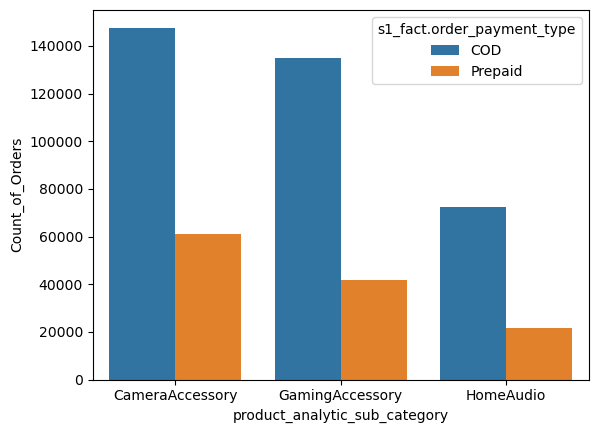

In [ ]:
# Plotting & analysing the count of orders for each of the sub-categories by Payment Type
orders_by_PaymentType = df_products.groupby(["s1_fact.order_payment_type","product_analytic_sub_category"])['revenue'].count().reset_index().rename(columns={'revenue':'Count_of_Orders'})
sns.barplot(x='product_analytic_sub_category', y='Count_of_Orders', hue="s1_fact.order_payment_type", data=orders_by_PaymentType)
plt.show()

INSIGHTs:

From the above visualizaton, we can observe that the highest count of orders was generated from the Camera Accessory followed by Gaming Accessory and then Home Audio for both the payment types.

## 4) Feature Engineering

In [ ]:
# Segregating & creating seperate datasets for each of the three product sub categories
game_acc = df_products[(df_products['product_analytic_sub_category']=='GamingAccessory')].drop('product_analytic_sub_category', axis = 1)
camera_acc = df_products[(df_products['product_analytic_sub_category']=='CameraAccessory')].drop('product_analytic_sub_category', axis = 1)
home_audio = df_products[(df_products['product_analytic_sub_category']=='HomeAudio')].drop('product_analytic_sub_category', axis=1)

In [ ]:
print(game_acc.shape)
print(camera_acc.shape)
print(home_audio.shape)

(176768, 14)
(208830, 14)
(94073, 14)


In [ ]:
# Defining the KPIs
def defineKPIs(df):
# Payment_mode
    df['payment_mode'] = df['s1_fact.order_payment_type'].apply(lambda x: 0 if x == "COD" else 1)

# Selling_price of each product
    df['selling_price'] = df['revenue']/df['units']

# Discount offered on each product
    df['discount'] = np.round((df['price']-df['selling_price'])/df['price'],1)

    return df

In [ ]:
# Adding the first three KPIs to each of the dataset
game_acc = defineKPIs(game_acc)
camera_acc = defineKPIs(camera_acc)
home_audio = defineKPIs(home_audio)

In [ ]:
game_acc.head()

,order_date,Year,Month,order_id,revenue,units,s1_fact.order_payment_type,sla,cust_id,product_analytic_vertical,price,product_procurement_sla,order_datetime,order_week,payment_mode,selling_price,discount
208830,2015-10-14,2015,10,1416985339691600,2750.0,1,COD,7,9041577304631719936,GamePad,3999,5,2015-10-14 22:54:54,42,0,2750.0,0.3
208831,2015-10-15,2015,10,1417669228375400,2899.0,1,Prepaid,5,8973831124140309504,GamePad,3999,5,2015-10-15 20:19:38,42,1,2899.0,0.3
208832,2015-10-17,2015,10,1419414998353400,2609.0,1,Prepaid,5,-4824142736471789568,GamePad,3999,5,2015-10-17 18:21:43,42,1,2609.0,0.3
208833,2015-10-26,2015,10,1427167582532600,2772.0,1,Prepaid,5,-3305365297260279808,GamePad,3999,5,2015-10-26 17:49:39,44,1,2772.0,0.3
208834,2015-10-16,2015,10,4417730112316700,2750.0,1,Prepaid,7,2297791966161220096,GamePad,3999,5,2015-10-16 04:02:08,42,1,2750.0,0.3


In [ ]:
# Developing premimum product category

def premiumProduct(df):
    q75 = df['revenue'].quantile(0.75)
    df['premium_product'] = df['revenue'].apply(lambda x:1 if (x>q75) else 0)
    return df

game_acc = premiumProduct(game_acc)
camera_acc = premiumProduct(camera_acc)
home_audio = premiumProduct(home_audio)


camera_acc.head()

,order_date,Year,Month,order_id,revenue,units,s1_fact.order_payment_type,sla,cust_id,product_analytic_vertical,price,product_procurement_sla,order_datetime,order_week,payment_mode,selling_price,discount,premium_product
0,2015-10-20,2015,10,2421912925714800,1990.0,1,COD,10,-1040442942046599936,CameraTripod,2099,3,2015-10-20 15:45:56,43,0,1990.0,0.1,1
1,2015-10-14,2015,10,4416592101738400,1690.0,1,Prepaid,4,-7604960843527140352,CameraTripod,2099,3,2015-10-14 12:05:15,42,1,1690.0,0.2,1
2,2015-10-17,2015,10,4419525153426400,1618.0,1,Prepaid,6,2894557208345299968,CameraTripod,2099,3,2015-10-17 21:25:03,42,1,1618.0,0.2,1
3,2015-10-17,2015,10,3419188825145600,3324.0,1,Prepaid,5,-7641546361891739648,CameraTripod,4044,5,2015-10-17 12:07:24,42,1,3324.0,0.2,1
4,2015-10-16,2015,10,3418428515041500,3695.0,1,Prepaid,6,-71561404148106600,CameraTripod,4044,5,2015-10-16 14:59:57,42,1,3695.0,0.1,1


### Importing NPS + Stock Index data and merging them with the dataset for each product category

In [ ]:
# Importing media data from the excel file & renaming the columns
nps_stock = pd.read_excel(r"C:\Users\prath\Downloads\Media data and other information.xlsx", sheet_name = 'Monthly NPS Score', header = 0).T.reset_index()
nps_stock = nps_stock[1:13].reset_index(drop=True)
nps_stock.columns = ['DT', 'NPS', 'Stock Index']
nps_stock

,DT,NPS,Stock Index
0,July'15,54.599588,1177.0
1,Aug'15,59.987101,1206.0
2,Sept'15,46.925419,1101.0
3,Oct'15,44.398389,1210.0
4,Nov'15,47.0,1233.0
5,Dec'15,45.8,1038.0
6,Jan'16,47.093031,1052.0
7,Feb'16,50.327406,1222.0
8,Mar'16,49.02055,1015.0
9,Apr'16,51.827605,1242.0


In [ ]:
# Creeating separate month and year columns data

nps_stock['Year']=[2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016]
nps_stock['Month']=[7,8,9,10,11,12,1,2,3,4,5,6]
nps_stock.drop('DT',axis=1,inplace=True)
nps_stock

,NPS,Stock Index,Year,Month
0,54.599588,1177.0,2015,7
1,59.987101,1206.0,2015,8
2,46.925419,1101.0,2015,9
3,44.398389,1210.0,2015,10
4,47.0,1233.0,2015,11
5,45.8,1038.0,2015,12
6,47.093031,1052.0,2016,1
7,50.327406,1222.0,2016,2
8,49.02055,1015.0,2016,3
9,51.827605,1242.0,2016,4


In [ ]:
# Changing data types

nps_stock['NPS'] = nps_stock['NPS'].astype('float')
nps_stock['Stock Index'] = nps_stock['Stock Index'].astype('float')

In [ ]:
nps_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NPS          12 non-null     float64
 1   Stock Index  12 non-null     float64
 2   Year         12 non-null     int64  
 3   Month        12 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 512.0 bytes


In [ ]:

# Adding the NPS feature/KPI to each of the three products category datasets
game_acc = pd.merge(nps_stock,game_acc,on=['Month','Year'],how='inner')
camera_acc = pd.merge(nps_stock,camera_acc,on=['Month','Year'],how='inner')
home_audio = pd.merge(nps_stock,home_audio,on=['Month','Year'],how='inner')

In [ ]:
game_acc.head()


,NPS,Stock Index,Year,Month,order_date,order_id,revenue,units,s1_fact.order_payment_type,sla,cust_id,product_analytic_vertical,price,product_procurement_sla,order_datetime,order_week,payment_mode,selling_price,discount,premium_product
0,54.599588,1177.0,2015,7,2015-07-10,169460596,2800.0,1,Prepaid,9,8996931547933859840,GamePad,3999,5,2015-07-10 22:22:38,28,1,2800.0,0.3,1
1,54.599588,1177.0,2015,7,2015-07-20,173845985,2700.0,1,COD,7,1095002556734790016,GamePad,3999,5,2015-07-20 09:47:28,30,0,2700.0,0.3,1
2,54.599588,1177.0,2015,7,2015-07-26,176570219,2679.0,1,Prepaid,5,-8900627232445830144,GamePad,3999,5,2015-07-26 20:26:01,30,1,2679.0,0.3,1
3,54.599588,1177.0,2015,7,2015-07-08,168513415,2789.0,1,Prepaid,7,6515060272718419968,GamePad,3999,5,2015-07-08 23:17:31,28,1,2789.0,0.3,1
4,54.599588,1177.0,2015,7,2015-07-17,172787973,2884.0,1,COD,6,-7661168602558889984,GamePad,3999,5,2015-07-17 20:47:03,29,0,2884.0,0.3,1


In [ ]:
# Gaming Accessory
# Aggregating weekly by either summing up or taking mean wherever relevant

def create_agg_data(df):
      df_sum = df[['revenue','units','order_week']].groupby('order_week').sum()
      df_mean = df[['sla','product_procurement_sla','order_week','price','selling_price','NPS','discount']].groupby('order_week').mean().replace(np.nan, 0)
      df_count = df[['order_id','order_week','premium_product']].groupby('order_week').count().rename(columns={'order_id':'total_transactions','premium_product':'total_premiumn_products'})

      df_final = pd.concat([df_sum,df_mean,df_count], axis = 1).reset_index()
      return df_final


In [ ]:
game_acc=create_agg_data(game_acc)
game_acc.head()

,order_week,revenue,units,sla,product_procurement_sla,price,selling_price,NPS,discount,total_transactions,total_premiumn_products
0,27,2.541842e+04,30,2.965517,2.551724,1383.655172,861.359449,54.599588,0.234483,29,29
1,28,1.974062e+06,2983,5.303829,2.864419,1164.942044,673.515788,54.599588,0.000000,2847,2847
2,29,1.698374e+06,2917,5.252525,2.405911,1027.168724,623.486806,54.599588,0.000000,2673,2673
3,30,1.833663e+06,2481,5.378604,2.180109,1318.154618,752.612801,54.599588,0.000000,2393,2393
4,31,1.326701e+06,1714,5.786715,2.113955,1505.914686,790.459067,54.602871,0.371359,1641,1641


In [ ]:
camera_acc=create_agg_data(camera_acc)
camera_acc.head()

,order_week,revenue,units,sla,product_procurement_sla,price,selling_price,NPS,discount,total_transactions,total_premiumn_products
0,27,1.819600e+04,28,2.500000,2.607143,1422.535714,649.857143,54.599588,0.45,28,28
1,28,2.111396e+06,2944,7.189545,2.611664,1568.085349,734.295775,54.599588,0.00,2812,2812
2,29,2.279836e+06,3120,6.552239,2.629187,1517.862687,742.391424,54.599588,0.00,3015,3015
3,30,2.197451e+06,3126,6.548850,2.661554,1481.453818,716.375153,54.599588,0.00,2999,2999
4,31,1.441793e+06,2038,6.518805,2.659454,1432.609480,724.857756,54.605139,0.00,1941,1941


In [ ]:
home_audio=create_agg_data(home_audio)
home_audio.head()


,order_week,revenue,units,sla,product_procurement_sla,price,selling_price,NPS,discount,total_transactions,total_premiumn_products
0,27,5.822342e+04,28,3.142857,3.035714,4263.500000,2079.408001,54.599588,0.446429,28,28
1,28,2.513885e+06,1686,7.556485,2.624029,2511.803347,1498.474630,54.599588,0.000000,1673,1673
2,29,2.909729e+06,1937,7.022291,2.460342,2605.824261,1505.877371,54.599588,0.326490,1929,1929
3,30,2.741510e+06,1855,7.081887,2.592733,2670.433839,1482.349221,54.599588,0.319957,1844,1844
4,31,2.050197e+06,1316,7.101449,2.578947,2800.144928,1560.841224,54.599588,0.331426,1311,1311


### Importing Media Investment data & and merging them with the dataset for each product category

In [ ]:
media_investment = pd.read_excel(r"C:\Users\prath\Downloads\Media data and other information.xlsx", sheet_name = 'Media Investment', header = 2)
media_investment

,Unnamed: 0,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,NaN,2015.0,7.0,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,NaN,NaN
1,NaN,2015.0,8.0,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,NaN,NaN
2,NaN,2015.0,9.0,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,NaN,NaN
3,NaN,2015.0,10.0,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN
4,NaN,2015.0,11.0,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,NaN,NaN
5,NaN,2015.0,12.0,106.745312,5.397502,3.063360,56.705419,1.067307,22.503756,6.826938,11.181030,NaN,NaN
6,NaN,2016.0,1.0,74.196000,4.380000,0.456000,4.200000,0.900000,22.900000,7.370000,4.200000,2.70,27.090000
7,NaN,2016.0,2.0,48.052000,2.586008,1.912651,11.725555,0.596771,19.892366,6.465019,4.873630,NaN,NaN
8,NaN,2016.0,3.0,100.024621,9.300000,2.100000,41.590000,0.370000,18.437818,6.217667,5.193591,0.87,15.945545
9,NaN,2016.0,4.0,56.848241,5.205196,0.871892,24.308354,0.034876,16.514510,5.693456,4.219958,NaN,NaN


In [ ]:
media_investment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         0 non-null      float64
 1   Year               12 non-null     float64
 2   Month              12 non-null     float64
 3   Total Investment   12 non-null     float64
 4   TV                 13 non-null     float64
 5   Digital            12 non-null     float64
 6   Sponsorship        12 non-null     float64
 7   Content Marketing  12 non-null     float64
 8   Online marketing   12 non-null     float64
 9    Affiliates        12 non-null     float64
 10  SEM                12 non-null     float64
 11  Radio              3 non-null      float64
 12  Other              3 non-null      float64
dtypes: float64(13)
memory usage: 1.8 KB


In [ ]:
# Cleaning the dataframe by removing extra rows & columns & formatting it in the required format

media_investment = media_investment.iloc[:12,1:13].reset_index()
media_investment.drop('index', inplace = True, axis = 1)

In [ ]:
# converting the data type of year & month into int type
media_investment['Year']  = media_investment['Year'] .astype('int')
media_investment['Month']  = media_investment['Month'] .astype('int')

In [ ]:

# Replacing Null values with 0 assuming zero investment for those channel/month/year
media_investment  = media_investment.fillna(0)

In [ ]:
media_investment

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,7,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,0.00,0.000000
1,2015,8,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,0.00,0.000000
2,2015,9,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,0.00,0.000000
3,2015,10,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,0.00,0.000000
4,2015,11,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,0.00,0.000000
5,2015,12,106.745312,5.397502,3.063360,56.705419,1.067307,22.503756,6.826938,11.181030,0.00,0.000000
6,2016,1,74.196000,4.380000,0.456000,4.200000,0.900000,22.900000,7.370000,4.200000,2.70,27.090000
7,2016,2,48.052000,2.586008,1.912651,11.725555,0.596771,19.892366,6.465019,4.873630,0.00,0.000000
8,2016,3,100.024621,9.300000,2.100000,41.590000,0.370000,18.437818,6.217667,5.193591,0.87,15.945545
9,2016,4,56.848241,5.205196,0.871892,24.308354,0.034876,16.514510,5.693456,4.219958,0.00,0.000000


In [ ]:
media_investment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               12 non-null     int32  
 1   Month              12 non-null     int32  
 2   Total Investment   12 non-null     float64
 3   TV                 12 non-null     float64
 4   Digital            12 non-null     float64
 5   Sponsorship        12 non-null     float64
 6   Content Marketing  12 non-null     float64
 7   Online marketing   12 non-null     float64
 8    Affiliates        12 non-null     float64
 9   SEM                12 non-null     float64
 10  Radio              12 non-null     float64
 11  Other              12 non-null     float64
dtypes: float64(10), int32(2)
memory usage: 1.2 KB


In [ ]:
# Mapping the Months & no of weeks in order to convert the media data on a weekly basis
weeks = {'Month':[1,2,3,4,5,6,7,8,9,10,11,12], 'number_of_weeks':[4,4,5,4,4,5,4,4,5,4,4,5]}
weeks_df = pd.DataFrame(weeks)
weeks_df

,Month,number_of_weeks
0,1,4
1,2,4
2,3,5
3,4,4
4,5,4
5,6,5
6,7,4
7,8,4
8,9,5
9,10,4


In [ ]:
# Merging the media_investment data with  months & no of weeks mapping
media_investment = pd.merge(media_investment,weeks_df, on = 'Month', how = 'inner')
media_investment

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,number_of_weeks
0,2015,7,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,0.00,0.000000,4
1,2015,8,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,0.00,0.000000,4
2,2015,9,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,0.00,0.000000,5
3,2015,10,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,0.00,0.000000,4
4,2015,11,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,0.00,0.000000,4
5,2015,12,106.745312,5.397502,3.063360,56.705419,1.067307,22.503756,6.826938,11.181030,0.00,0.000000,5
6,2016,1,74.196000,4.380000,0.456000,4.200000,0.900000,22.900000,7.370000,4.200000,2.70,27.090000,4
7,2016,2,48.052000,2.586008,1.912651,11.725555,0.596771,19.892366,6.465019,4.873630,0.00,0.000000,4
8,2016,3,100.024621,9.300000,2.100000,41.590000,0.370000,18.437818,6.217667,5.193591,0.87,15.945545,5
9,2016,4,56.848241,5.205196,0.871892,24.308354,0.034876,16.514510,5.693456,4.219958,0.00,0.000000,4


In [ ]:
# Calculating & deriving the media investments on weekly basis
def derived_media_investment(df,a):
  return df[a]/df['number_of_weeks']

for i in media_investment.columns[3:]:
  derived_media_investment(media_investment,i)

media_investment.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,number_of_weeks
0,2015,7,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,0.0,0.0,4
1,2015,8,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,0.0,0.0,4
2,2015,9,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,0.0,0.0,5
3,2015,10,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,0.0,0.0,4
4,2015,11,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,0.0,0.0,4


In [ ]:
# Pulling the order_week, month & year from the original dataset
order_week = df_products[['order_week',"Month","Year"]].drop_duplicates(keep = 'first', subset = None).reset_index().drop('index', axis = 1).sort_values(by = 'order_week')
order_week = order_week.sort_values(by = ['order_week','Month']).drop_duplicates(keep = 'last', subset = 'order_week')
order_week

,order_week,Month,Year
54,27,7,2015
52,28,7,2015
50,29,7,2015
51,30,7,2015
57,31,8,2015
56,32,8,2015
61,33,8,2015
62,34,8,2015
17,35,8,2015
59,36,9,2015


In [ ]:
# Merging the media_investment_data with the order_week data
media_investment_weekly = pd.merge(order_week, media_investment, on = ["Month","Year"], how = "inner").drop('number_of_weeks', axis =1)
media_investment_weekly.head()

,order_week,Month,Year,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,27,7,2015,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,0.0,0.0
1,28,7,2015,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,0.0,0.0
2,29,7,2015,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,0.0,0.0
3,30,7,2015,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,0.0,0.0
4,31,8,2015,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,0.0,0.0


In [ ]:
# Lets plot & analyze the Weekly Spends on each channel
def plot_weekly_spends(df,a):
     fig = plt.figure(figsize=(10,30))
     ax1 = fig.add_subplot(911)
     ax1.set_title(a+': Weekly Trend')
     media_investment_weekly.plot(x= 'order_week',y=[a],ax = ax1)
     fig.tight_layout()
     plt.show()

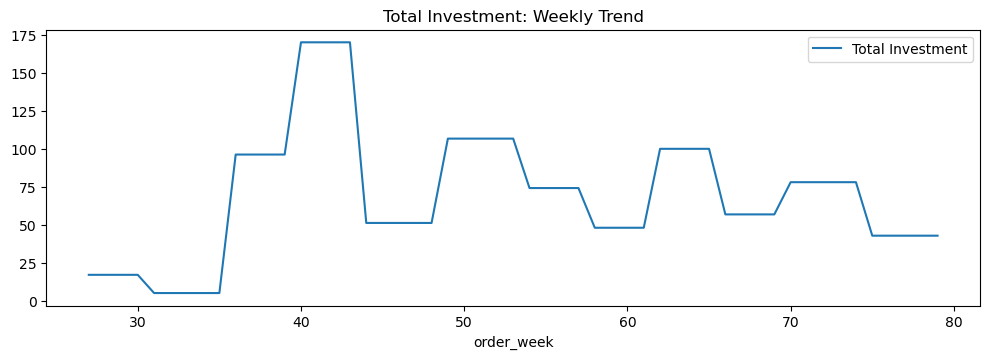

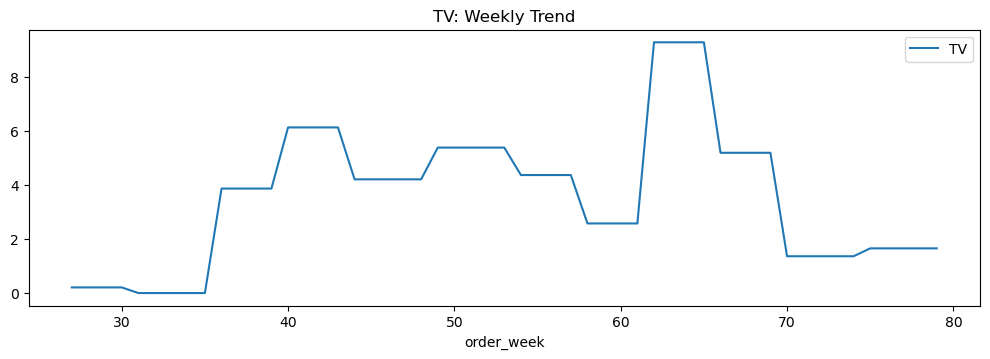

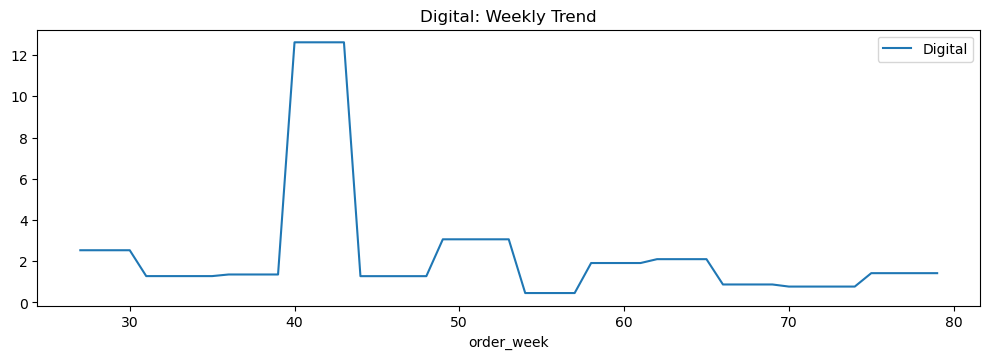

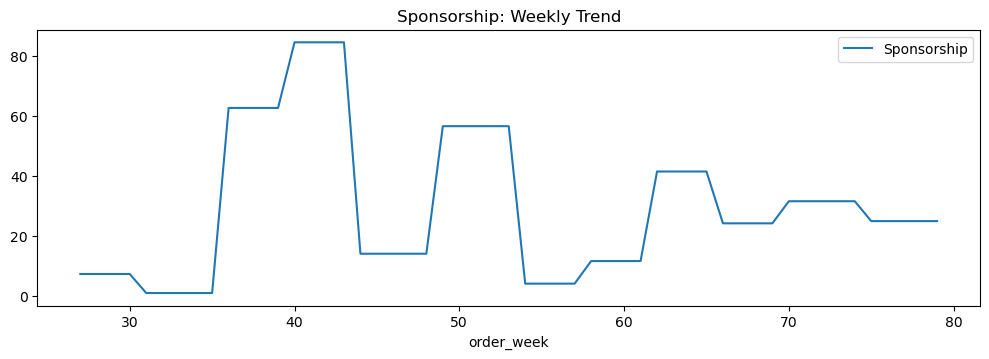

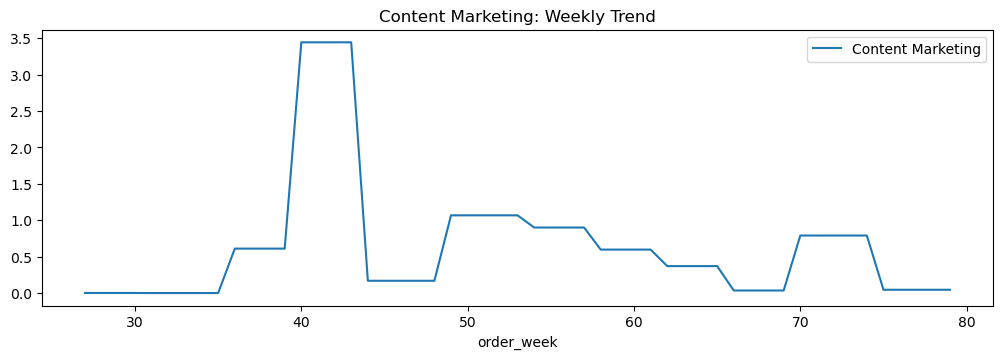

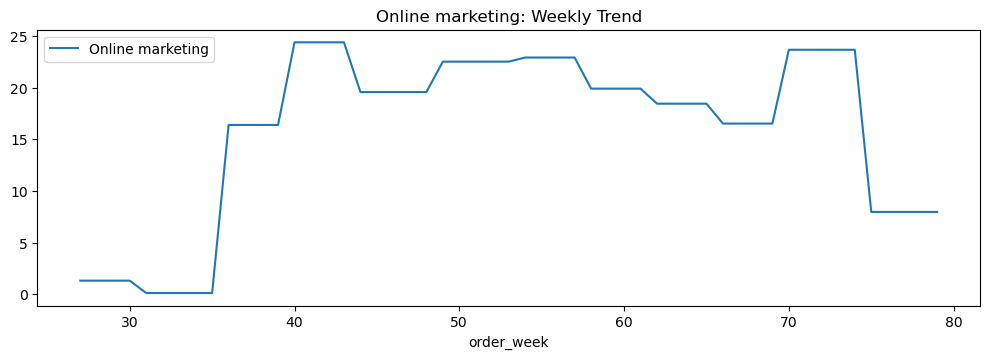

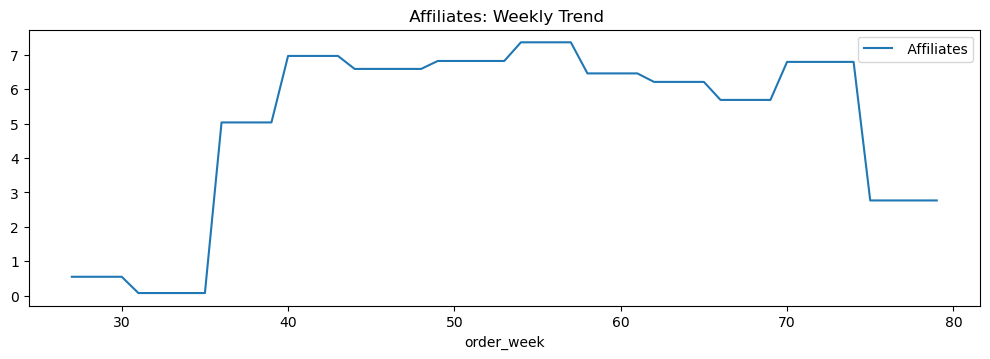

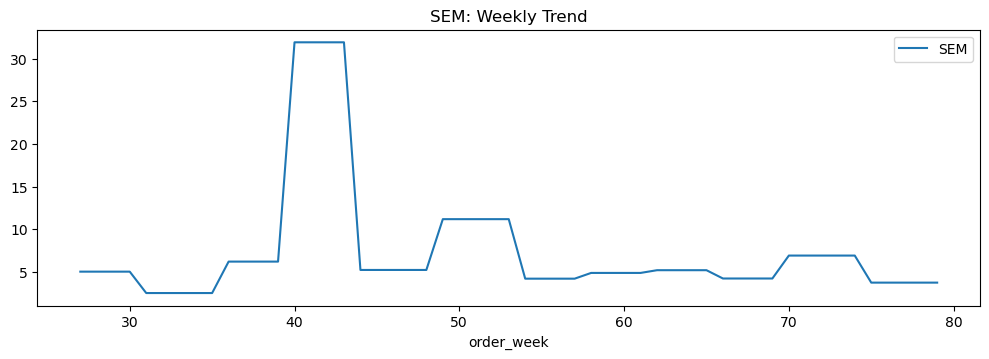

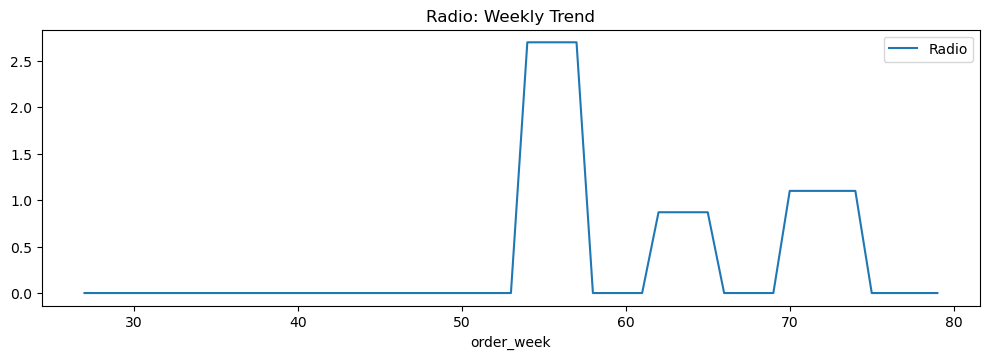

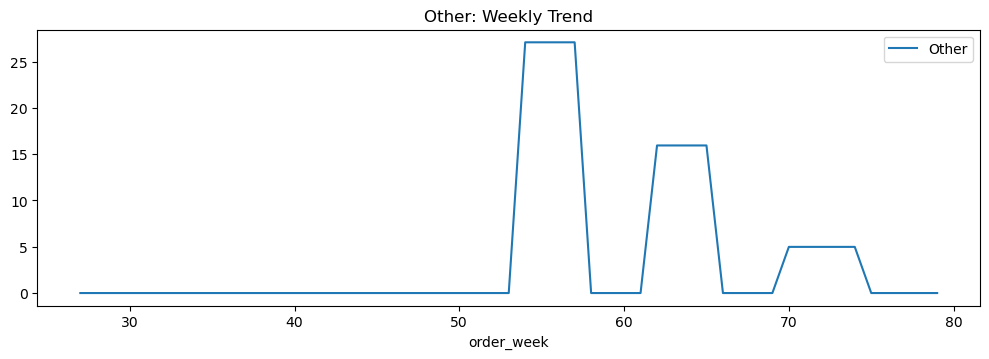

In [ ]:
for i in media_investment_weekly.columns[3:]:
    plot_weekly_spends(media_investment_weekly,i)

In [ ]:
# Defingin the Adstock fucntion to create the adstocks data
def getAdStockData(media_investment_weekly,col_name, adstock_rate):
    media_investment_weekly['week_carry_over_1_value'] = adstock_rate**1 * media_investment_weekly[col_name]
    media_investment_weekly['week_carry_over_2_value'] = adstock_rate**2 * media_investment_weekly[col_name]
    media_investment_weekly['week_carry_over_3_value'] = adstock_rate**3 * media_investment_weekly[col_name]
    media_investment_weekly['week_carry_over_4_value'] = adstock_rate**4 * media_investment_weekly[col_name]
    media_investment_weekly['week_carry_over_5_value'] = adstock_rate**5 * media_investment_weekly[col_name]
    for i in range(0, len(media_investment_weekly)):
        week1CarryOverValue  = media_investment_weekly.loc[i-1,["week_carry_over_1_value"]][0] if(i-1 > -1) else 0
        week2CarryOverValue  = media_investment_weekly.loc[i-2,["week_carry_over_2_value"]][0] if(i-2 > -1) else 0
        week3CarryOverValue  = media_investment_weekly.loc[i-3,["week_carry_over_3_value"]][0] if(i-3 > -1) else 0
        week4CarryOverValue  = media_investment_weekly.loc[i-4,["week_carry_over_4_value"]][0] if(i-4 > -1) else 0
        week5CarryOverValue  = media_investment_weekly.loc[i-5,["week_carry_over_5_value"]][0] if(i-5 > -1) else 0
        media_investment_weekly.loc[i,"adStock_"+col_name] = media_investment_weekly.loc[i,[col_name]][0] + week1CarryOverValue + week2CarryOverValue + week3CarryOverValue + week4CarryOverValue + week5CarryOverValue
    return media_investment_weekly[["order_week","adStock_"+col_name]]

In [ ]:
# Computing adstocks for each of the investment channel
adStock_TV = getAdStockData(media_investment_weekly[['TV','order_week']],"TV", 0.5)[["adStock_TV"]]
adStock_digital = getAdStockData(media_investment_weekly[['Digital','order_week']],"Digital", 0.5)[["adStock_Digital"]]
adStock_sponsorship = getAdStockData(media_investment_weekly[['Sponsorship','order_week']],"Sponsorship", 0.5)[["adStock_Sponsorship"]]
adStock_content_marketing = getAdStockData(media_investment_weekly[['Content Marketing','order_week']],"Content Marketing", 0.5)[["adStock_Content Marketing"]]
adStock_online_marketing = getAdStockData(media_investment_weekly[['Online marketing','order_week']],"Online marketing", 0.5)[["adStock_Online marketing"]]
adStock_affiliates = getAdStockData(media_investment_weekly[[' Affiliates','order_week']]," Affiliates", 0.5)[["adStock_ Affiliates"]]
adStock_SEM = getAdStockData(media_investment_weekly[['SEM','order_week']],"SEM", 0.5)[["adStock_SEM"]]
adStock_radio = getAdStockData(media_investment_weekly[['Radio','order_week']],"Radio", 0.5)[["adStock_Radio"]]
adStock_other = getAdStockData(media_investment_weekly[['Other','order_week']],"Other", 0.5)

C:\Users\prath\AppData\Local\Temp\ipykernel_32272\1213474049.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  media_investment_weekly['week_carry_over_1_value'] = adstock_rate**1 * media_investment_weekly[col_name]
C:\Users\prath\AppData\Local\Temp\ipykernel_32272\1213474049.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  media_investment_weekly['week_carry_over_2_value'] = adstock_rate**2 * media_investment_weekly[col_name]
C:\Users\prath\AppData\Local\Temp\ipykernel_32272\1213474049.py:5: SettingWi

In [ ]:
adstock_final = pd.concat([adStock_TV,adStock_digital,adStock_sponsorship, adStock_content_marketing, adStock_online_marketing, adStock_affiliates, adStock_SEM, adStock_radio, adStock_other], axis = 1)
adstock_final

,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,adStock_Radio,order_week,adStock_Other
0,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,0.000000,27,0.000000
1,0.322995,3.799521,11.121405,0.001399,1.990916,0.820881,7.535546,0.000000,28,0.000000
2,0.376828,4.432774,12.974972,0.001633,2.322736,0.957694,8.791471,0.000000,29,0.000000
3,0.403744,4.749401,13.901756,0.001749,2.488645,1.026101,9.419433,0.000000,30,0.000000
4,0.208310,3.652774,8.014210,0.000881,1.373567,0.586734,7.223244,0.000000,31,0.000000
5,0.110593,3.104461,5.070437,0.000447,0.816028,0.367051,6.125150,0.000000,32,0.000000
6,0.058370,2.790726,3.482702,0.000215,0.516519,0.248659,5.497608,0.000000,33,0.000000
7,0.032259,2.633858,2.688835,0.000099,0.366765,0.189463,5.183837,0.000000,34,0.000000
8,0.019203,2.555424,2.291901,0.000041,0.291888,0.159864,5.026951,0.000000,35,0.000000
9,3.885741,2.594661,63.817754,0.610298,16.505195,5.109648,8.637129,0.000000,36,0.000000


In [ ]:
# Merging the adstock data with the media investment data on order week
adstock_final_data = pd.merge(media_investment_weekly,adstock_final, on = "order_week", how = 'inner')

In [ ]:
adstock_final_data

,order_week,Month,Year,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,...,Other,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,adStock_Radio,adStock_Other
0,27,7,2015,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,...,0.000000,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,0.000000,0.000000
1,28,7,2015,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,...,0.000000,0.322995,3.799521,11.121405,0.001399,1.990916,0.820881,7.535546,0.000000,0.000000
2,29,7,2015,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,...,0.000000,0.376828,4.432774,12.974972,0.001633,2.322736,0.957694,8.791471,0.000000,0.000000
3,30,7,2015,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,...,0.000000,0.403744,4.749401,13.901756,0.001749,2.488645,1.026101,9.419433,0.000000,0.000000
4,31,8,2015,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,...,0.000000,0.208310,3.652774,8.014210,0.000881,1.373567,0.586734,7.223244,0.000000,0.000000
5,32,8,2015,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,...,0.000000,0.110593,3.104461,5.070437,0.000447,0.816028,0.367051,6.125150,0.000000,0.000000
6,33,8,2015,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,...,0.000000,0.058370,2.790726,3.482702,0.000215,0.516519,0.248659,5.497608,0.000000,0.000000
7,34,8,2015,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,...,0.000000,0.032259,2.633858,2.688835,0.000099,0.366765,0.189463,5.183837,0.000000,0.000000
8,35,8,2015,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,...,0.000000,0.019203,2.555424,2.291901,0.000041,0.291888,0.159864,5.026951,0.000000,0.000000
9,36,9,2015,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,...,0.000000,3.885741,2.594661,63.817754,0.610298,16.505195,5.109648,8.637129,0.000000,0.000000


In [ ]:
adstock_final_data.drop(['Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other'],inplace = True, axis = 1)


In [ ]:
adstock_final_data.head()

,order_week,Month,Year,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,adStock_Radio,adStock_Other
0,27,7,2015,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,0.0,0.0
1,28,7,2015,0.322995,3.799521,11.121405,0.001399,1.990916,0.820881,7.535546,0.0,0.0
2,29,7,2015,0.376828,4.432774,12.974972,0.001633,2.322736,0.957694,8.791471,0.0,0.0
3,30,7,2015,0.403744,4.749401,13.901756,0.001749,2.488645,1.026101,9.419433,0.0,0.0
4,31,8,2015,0.208310,3.652774,8.014210,0.000881,1.373567,0.586734,7.223244,0.0,0.0


In [ ]:
adstock_final_data.shape

(53, 12)

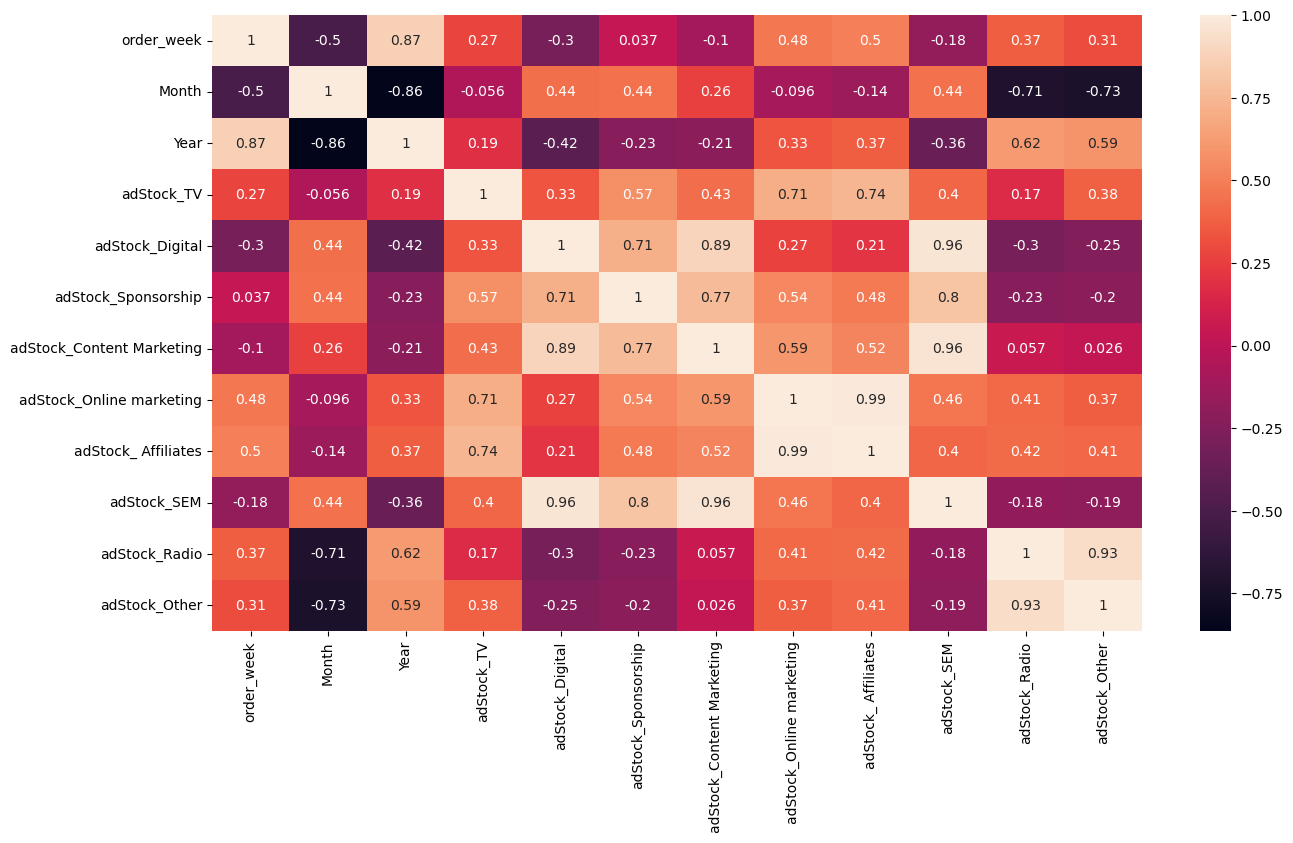

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(adstock_final_data.corr(), annot = True)
plt.show()

In [ ]:
# Mereging the adstock data with 3 prodyct sub categories

camera_acc= pd.merge(adstock_final_data,camera_acc, on = "order_week", how = 'right')
game_acc = pd.merge(adstock_final_data,game_acc, on = "order_week", how = 'right')
home_audio = pd.merge(adstock_final_data,home_audio, on = "order_week", how = 'right')

In [ ]:
print(camera_acc.shape)
print(game_acc.shape)
print(home_audio.shape)

(52, 22)
(53, 22)
(50, 22)


In [ ]:
# Lets plot & analyze the Weekly Spends on each channel
def plot_revenue_trend(df,a, color):
      plt.figure(figsize = (15,3))
      ax3 = plt.title(a+' - Total Revenue')
      ax3 = plt.plot(df['order_week'],df['revenue'],color=color)
      plt.xticks(df['order_week'])
      plt.show()

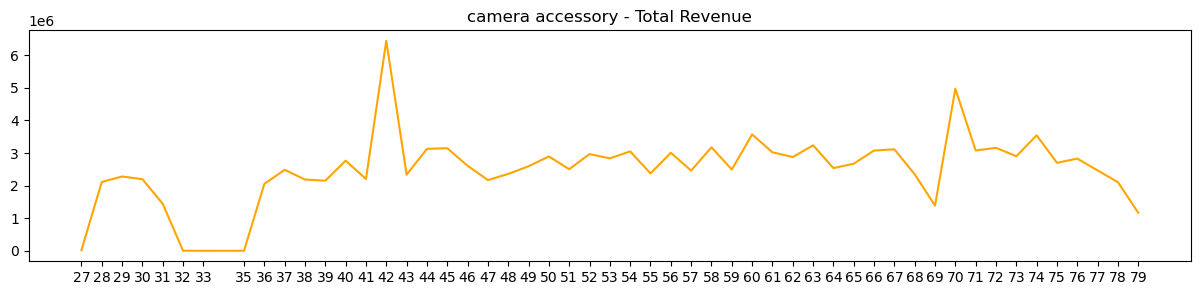

In [ ]:
plot_revenue_trend(camera_acc,"camera accessory", 'orange')

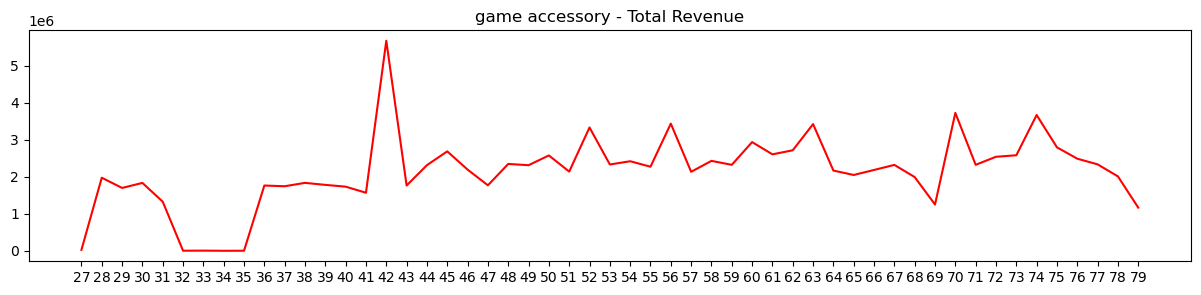

In [ ]:
plot_revenue_trend(game_acc,"game accessory",'red')

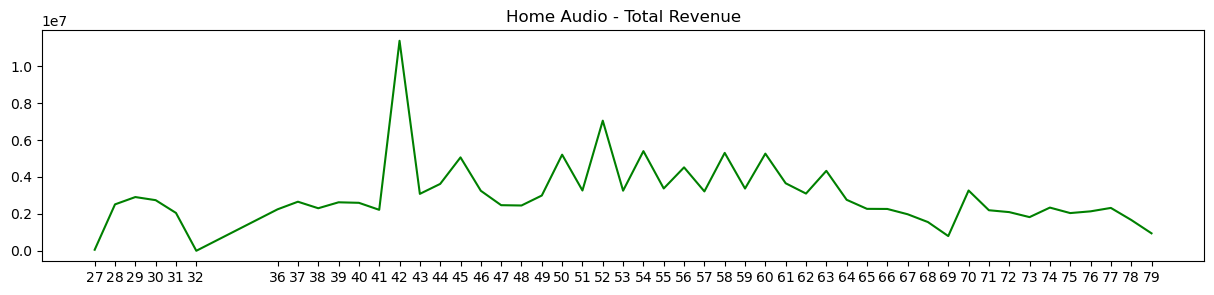

In [ ]:
plot_revenue_trend(home_audio,"Home Audio",'green')

INSIGHTs:

We could see the similar trend for no of orders as well, as the maximum number of orders were generated in week-42. And the highes was for Gaming Accessory.

In [ ]:
def plot_reg_plot():
  fig = plt.figure(figsize=(15,4))
  ax1 = fig.add_subplot(1,3,1)
  ax1.set_title('Revenue vs NPS : Home Audio')
  ax2 = fig.add_subplot(1,3,2)
  ax2.set_title('Revenue vs NPS : Camera Accessory')
  ax3 = fig.add_subplot(1,3,3)
  ax3.set_title('Revenue vs NPS : Gaming Accessory')

  sns.regplot(x=home_audio['NPS'],y=home_audio['revenue'],ax = ax1)
  sns.regplot(x=camera_acc['NPS'],y=camera_acc['revenue'],ax = ax2)
  sns.regplot(x=game_acc['NPS'],y=game_acc['revenue'],ax = ax3)

  fig.tight_layout()
  plt.show()

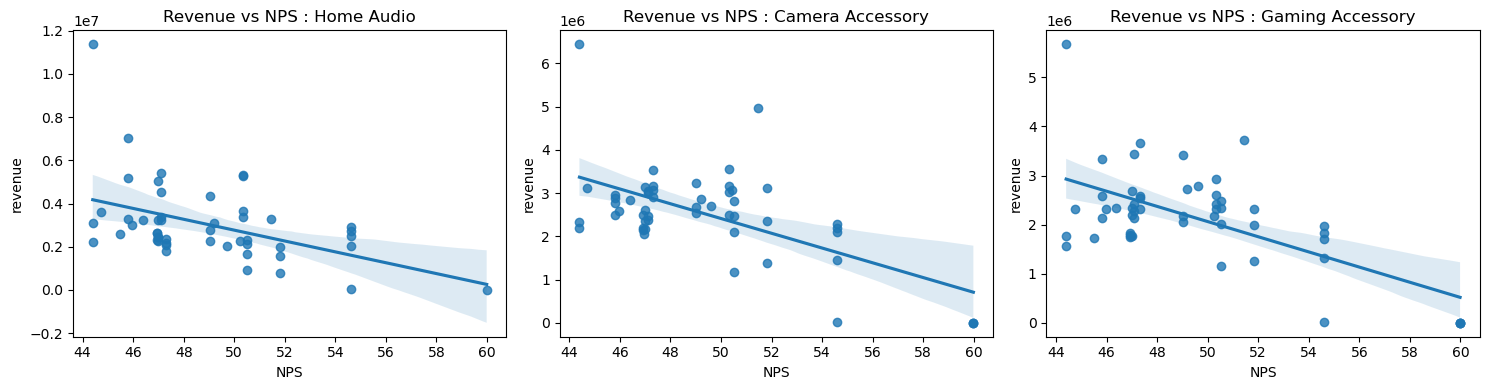

In [ ]:
plot_reg_plot()

INSIGHTs:

From the above regplot, we can see a slightly negative correlation between the NPS & total sales/Revenue across all the categories

## 5) Model Building & Evaluation

1) Basic Additive Linear Model

In [ ]:
# calculate the elasticity of the important KPIs
def getElasticity(train, gmv, coefficient):
    elasticity = []
    for i in coefficient.feature:
        feature_mean = train[i].mean()
        elasticity.append((((coefficient.loc[coefficient['feature']==i]['coefficient'].mean())*feature_mean)/gmv.mean()))
    coefficient['elasticity'] = pd.Series(elasticity)
    return coefficient

1. Camera Accessory - Basic Additive Linear Model

In [ ]:
camera_acc.head()

,order_week,Month,Year,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,...,revenue,units,sla,product_procurement_sla,price,selling_price,NPS,discount,total_transactions,total_premiumn_products
0,27,7,2015,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,...,1.819600e+04,28,2.500000,2.607143,1422.535714,649.857143,54.599588,0.45,28,28
1,28,7,2015,0.322995,3.799521,11.121405,0.001399,1.990916,0.820881,7.535546,...,2.111396e+06,2944,7.189545,2.611664,1568.085349,734.295775,54.599588,0.00,2812,2812
2,29,7,2015,0.376828,4.432774,12.974972,0.001633,2.322736,0.957694,8.791471,...,2.279836e+06,3120,6.552239,2.629187,1517.862687,742.391424,54.599588,0.00,3015,3015
3,30,7,2015,0.403744,4.749401,13.901756,0.001749,2.488645,1.026101,9.419433,...,2.197451e+06,3126,6.548850,2.661554,1481.453818,716.375153,54.599588,0.00,2999,2999
4,31,8,2015,0.208310,3.652774,8.014210,0.000881,1.373567,0.586734,7.223244,...,1.441793e+06,2038,6.518805,2.659454,1432.609480,724.857756,54.605139,0.00,1941,1941


In [ ]:
# dropping the columns which are under no control of the company
camera_acc_model = camera_acc.drop(['selling_price','units','price','total_transactions'], axis = 1)

In [ ]:
camera_acc_model.shape

(52, 18)

In [ ]:
# splitting dataset into train & test
df_train, df_test = train_test_split(camera_acc_model, train_size = 0.8, test_size = 0.2, random_state = 100)

In [ ]:
# Assigning the X_train, X_test, y_train & y_test values
y_train = df_train.pop('revenue')
X_train = df_train

y_test = df_test.pop('revenue')
X_test = df_test

In [ ]:
camera_acc_model.shape


(52, 18)

In [ ]:
# Scaling all the numerical values
scaler = StandardScaler()
num_cols=list(camera_acc_model.select_dtypes(include=[np.number]).columns)
num_cols.remove("order_week")
num_cols.remove("revenue")
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

### Applying RFE for Feature Selection

##### Recursive Feature Elimination, or RFE for short, is a popular feature selection algorithm.

RFE is popular because it is easy to configure and use and because it is effective at selecting those features (columns) in a training dataset that are more or most relevant in predicting the target variable.

There are two important configuration options when using RFE: the choice in the number of features to select and the choice of the algorithm used to help choose features. Both of these hyperparameters can be explored, although the performance of the method is not strongly dependent on these hyperparameters being configured well.

In [ ]:
# Executing RFE by limiting the features to 20
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=15, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [ ]:
# top 15 features selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'product_procurement_sla', 'discount',
       'total_premiumn_products'],
      dtype='object')

In [ ]:
# Creating X_train_rfe dataframe with RFE selected features
X_train_rfe = X_train[cols]
X_test_rfe = X_test[cols]

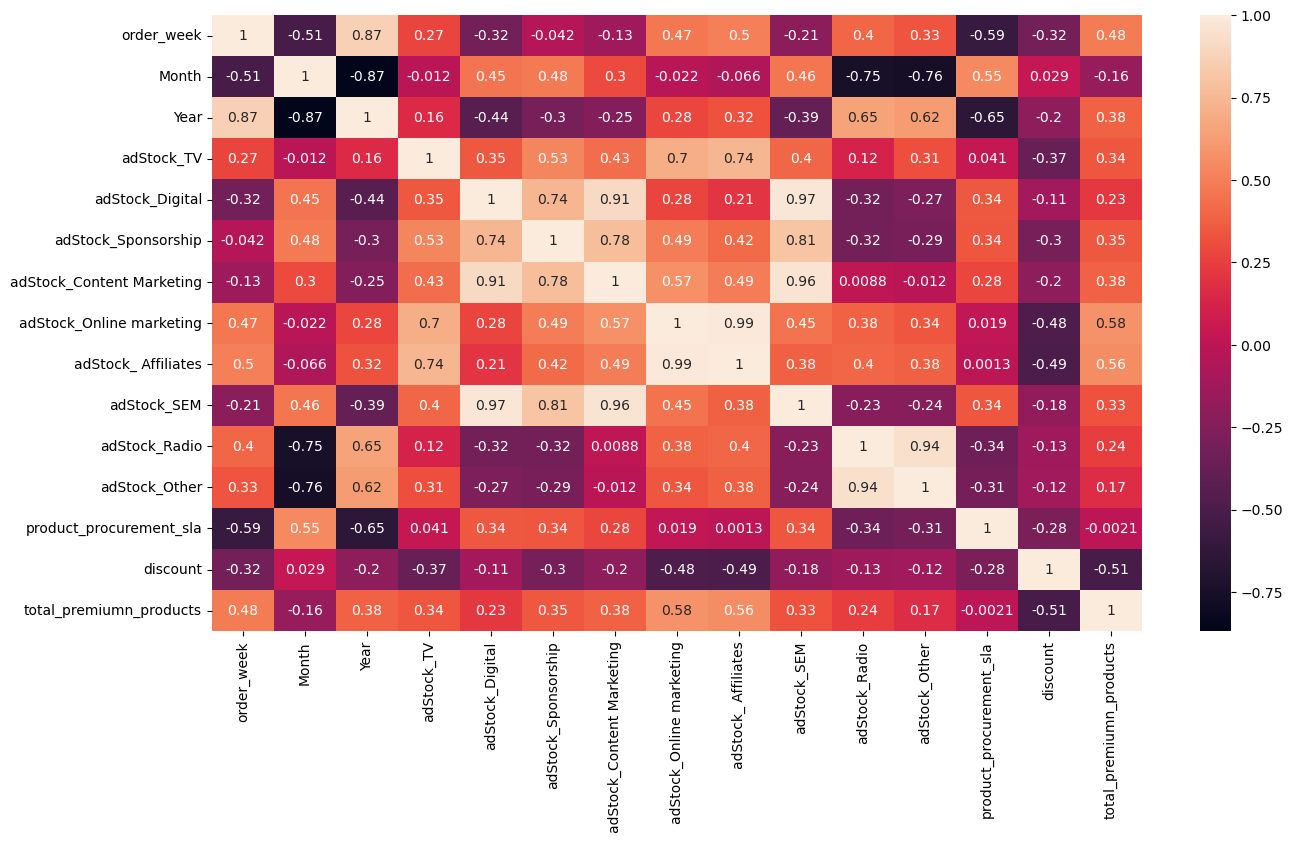

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(X_train_rfe.corr(), annot = True)
plt.show()

### The correlation plot helps us to understand that some adstock feature (adStock SEM, adstock content Marketing) show higher correlation even after feature elemination technique. But for time ebing we can proceed to runt the model. We can do feature transformation for two features to see if correlation decreases.

In [ ]:
# Log transformation

X_train_rfe['adStock_SEM']=np.log(X_train_rfe['adStock_SEM'])

C:\Users\prath\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\prath\AppData\Local\Temp\ipykernel_32272\3197825188.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_rfe['adStock_SEM']=np.log(X_train_rfe['adStock_SEM'])


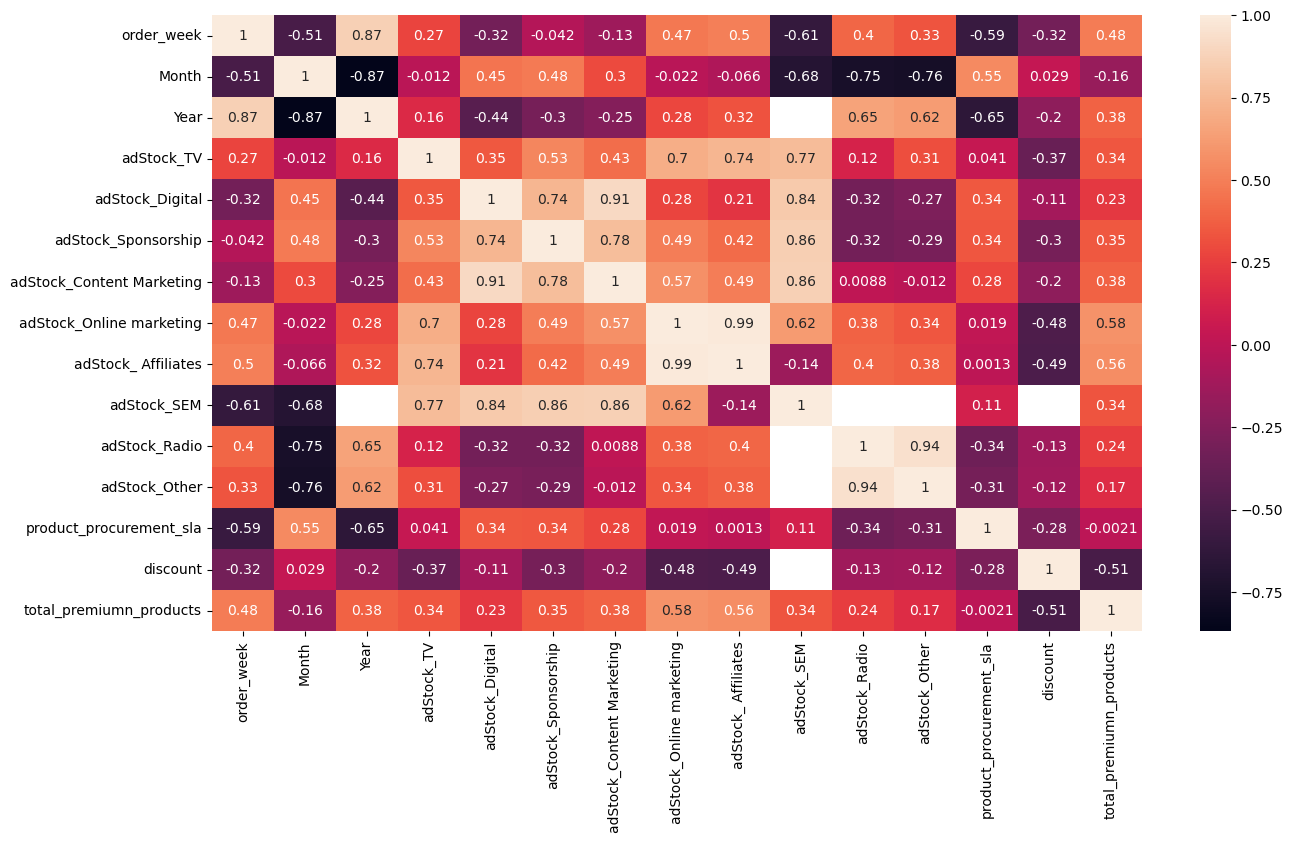

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(X_train_rfe.corr(), annot = True)
plt.show()

### There is decrease in correlation. We can also reduce correlation between ad stock digital and adstock content marketing but for now we will proceed to model.

### It is always better to plot a Decision tree prior any modelling to as to give a understanding of the data

#### Due to log transformation there is a possibility of NaN or infinite values generating. impute with mean

In [ ]:
# Step 1: Make an instance of the Model
X_train_rfe=X_train_rfe.fillna(X_train_rfe.mean())

# Define Decision tree
clf = DecisionTreeRegressor(max_depth = 2,
                             random_state = 0)
# Step 2: Train the model on the data
clf.fit(X_train_rfe, y_train)
# Step 3: Predict labels of unseen (test) data
clf.predict(X_test_rfe)

array([ 711749.22609641, 2607064.75702354, 2607064.75702354,
       2607064.75702354, 2607064.75702354,  711749.22609641,
        711749.22609641, 2607064.75702354, 2607064.75702354,
       2607064.75702354, 2607064.75702354])

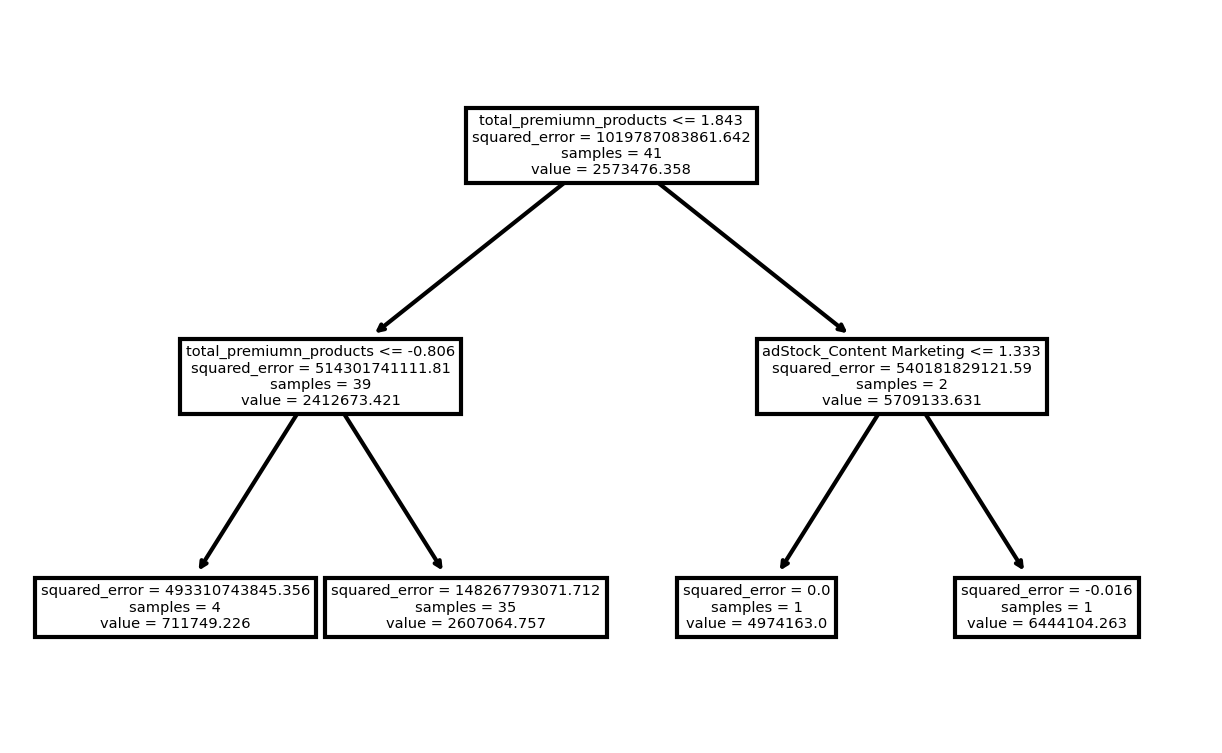

In [ ]:
# Assign Feature names
fn=list(cols)
cn= 'revenue'

# plot Decision tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,3), dpi=300)
tree.plot_tree(clf, feature_names = fn,class_names=cn);

### This helps us to understand that Total premium products is the main factor while checking the spent in revenue. Means number of premium products sold in week affects the total revenue generation.
### The second most important factor is adstock content marketing. The spend in this channel adstock for content marketing highly impacts the revenue generation.

In [ ]:
# Adding a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
model = LinearRegression()
model.fit( X_train_lm, y_train)
print(model.score(X_train_lm, y_train))
pd.DataFrame(zip(X_train_rfe, model.coef_), columns=['Feature', "coefficent Value"])

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     167.0
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           3.08e-21
Time:                        12:10:56   Log-Likelihood:                -530.36
No. Observations:                  41   AIC:                             1093.
Df Residuals:                      25   BIC:                             1120.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Feature,coefficent Value
0,order_week,0.000000e+00
1,Month,5.515917e+04
2,Year,-6.950398e+05
3,adStock_TV,-1.470042e+06
4,adStock_Digital,2.553712e+05
5,adStock_Sponsorship,-6.426666e+05
6,adStock_Content Marketing,-3.668051e+05
7,adStock_Online marketing,9.002679e+05
8,adStock_ Affiliates,5.048053e+04
9,adStock_SEM,-3.727835e+05


## Important-
### As the VIF score is gretaer than 10. Ceratinly there is a issue of overfitting in the model. But the main constraint of MMM is that we cannot eliminate a lot of factors / vvariable simply because it is statistically not suited. What we can do is to handle overfitting by other method such as regularization.

### Trying Ridge Regression

#### Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values.

In [ ]:
# Create a first fitted model
model = Ridge(alpha=1.0)
model.fit( X_train_lm, y_train)
print(model.score(X_train_lm, y_train))

0.9842697551477418


#### Certainly there is decrease in coeff of detertmination from 99 to 98.42. Overfitting has been decreased.

In [ ]:
pd.DataFrame(zip(X_train_rfe, model.coef_), columns=['Feature', "coefficent Value"])

,Feature,coefficent Value
0,order_week,0.000000
1,Month,-205.058271
2,Year,63616.894087
3,adStock_TV,-108312.184847
4,adStock_Digital,9809.507859
5,adStock_Sponsorship,10170.213639
6,adStock_Content Marketing,-72854.601413
7,adStock_Online marketing,57799.067291
8,adStock_ Affiliates,5362.013719
9,adStock_SEM,6601.860982


### As we can see there is huge difference in the coefficent value from using linear regression to Ridge Regression. Interpretibility has increased too !!

### Using hyperparameter optmization for Ridge CV using different Lambda values

In [ ]:
# Create a first fitted mode
# Create a function called lasso,
def ridge(alphas, X, y):

    # Create an empty data frame
    df = pd.DataFrame()


    # Create a column of feature names
    df['Feature Name'] = X.columns

    score=[]
    colmn_name=[]
# For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a Ridge regression with that alpha value,
        ridge = Ridge(alpha=alpha)

        # Fit the lasso regression
        ridge.fit(X, y)

        #score
        score.append(ridge.score(X, y))


        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha
        colmn_name.append(column_name)


        # Create a column of coefficient values
        df[column_name] = ridge.coef_

    colmn_name.insert(0,'Feature Name')
    score.insert(0,"Model Score")

    df.loc[len(df.index)] = score

    # Return the datafram
    return df

In [ ]:
ridge([.0001,0.001,0.01,0.1,1, .5,5, 10],X_train_lm, y_train)

,Feature Name,Alpha = 0.000100,Alpha = 0.001000,Alpha = 0.010000,Alpha = 0.100000,Alpha = 1.000000,Alpha = 0.500000,Alpha = 5.000000,Alpha = 10.000000
0,const,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
1,order_week,5.503000e+04,5.389751e+04,4.481283e+04,1.587466e+04,-205.058271,2178.533725,-439.373608,1997.449717
2,Month,-6.932212e+05,-6.772599e+05,-5.484254e+05,-1.382226e+05,63616.894087,41985.938641,45591.034092,30140.860239
3,Year,-1.466972e+06,-1.440008e+06,-1.221290e+06,-5.127052e+05,-108312.184847,-173713.820424,-30745.945458,-14331.542173
4,adStock_TV,2.546446e+05,2.483502e+05,2.018421e+05,7.670555e+04,9809.507859,22361.934420,-16241.793234,-21853.993355
5,adStock_Digital,-6.412931e+05,-6.292494e+05,-5.321710e+05,-2.032342e+05,10170.213639,-24623.415918,44055.330806,51254.234284
6,adStock_Sponsorship,-3.659827e+05,-3.588665e+05,-3.066677e+05,-1.639546e+05,-72854.601413,-91698.169700,-28826.009709,-5973.459306
7,adStock_Content Marketing,8.985192e+05,8.831614e+05,7.581265e+05,3.277993e+05,57799.067291,97820.265559,44100.727267,54766.224469
8,adStock_Online marketing,4.851553e+04,3.209801e+04,-5.647330e+04,-7.251721e+04,5362.013719,-12315.937538,39874.168165,52495.868297
9,adStock_ Affiliates,-3.701401e+05,-3.477655e+05,-2.107614e+05,-3.032901e+04,6601.860982,-142.073589,28221.269748,38918.256655


#### As we can see that The score decreases as we increase the penalty but also the coefficent value become more interpretable. One of the Key point in MMM  is its usability for marketing analyst to make informed decision by actuallly using this equation. Therefore even if the model explainability is at 93.62 we can still use the model rather as the coefficent are within usable range.

#### its suggested to optimize the Lambda value such that feature coefficent come in range with the predited value. In our case mean revenue value is at 25,73,476.
#### Therefore our coefficent make logic here at lambda 0.5, 5 and 10.

#### Given the model performance we will use lambda as 0.5 for retaining maximum explainability regrading the variance in model.


### Next we will explore another regularization method LASSO

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of muticollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

In [ ]:
# Create a first fitted model
model = Lasso(alpha=1.0)
model.fit( X_train_lm, y_train)
print(model.score(X_train_lm, y_train))

0.9899395776179082


C:\Users\prath\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.104e+11, tolerance: 4.181e+09
  model = cd_fast.enet_coordinate_descent(


In [ ]:
pd.DataFrame(zip(X_train_rfe, model.coef_), columns=['Feature', "coefficent Value"])

,Feature,coefficent Value
0,order_week,0.000000e+00
1,Month,4.490380e+04
2,Year,-5.484377e+05
3,adStock_TV,-1.230798e+06
4,adStock_Digital,1.913346e+05
5,adStock_Sponsorship,-5.603452e+05
6,adStock_Content Marketing,-2.931032e+05
7,adStock_Online marketing,7.999589e+05
8,adStock_ Affiliates,-2.641650e+05
9,adStock_SEM,-1.927540e+04


In [ ]:
# Create a first fitted mode
# Create a function called lasso,
def Lasso_model(alphas, X, y):

    # Create an empty data frame
    df = pd.DataFrame()


    # Create a column of feature names
    df['Feature Name'] = X.columns

    score=[]
    colmn_name=[]
# For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a Lasso regression with that alpha value,
        ridge = Lasso(alpha=alpha)

        # Fit the lasso regression
        ridge.fit(X, y)

        #score
        score.append(ridge.score(X, y))


        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha
        colmn_name.append(column_name)


        # Create a column of coefficient values
        df[column_name] = ridge.coef_

    colmn_name.insert(0,'Feature Name')
    score.insert(0,"Model Score")

    df.loc[len(df.index)] = score

    # Return the datafram
    return df

In [ ]:
Lasso_model([.0001,0.001,0.01,0.1,1, .5,5, 10],X_train_lm, y_train)

C:\Users\prath\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.103e+11, tolerance: 4.181e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\prath\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.103e+11, tolerance: 4.181e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\prath\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.103e+11, toleranc

,Feature Name,Alpha = 0.000100,Alpha = 0.001000,Alpha = 0.010000,Alpha = 0.100000,Alpha = 1.000000,Alpha = 0.500000,Alpha = 5.000000,Alpha = 10.000000
0,const,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,order_week,4.493778e+04,4.493775e+04,4.493744e+04,4.493439e+04,4.490380e+04,4.492080e+04,4.476710e+04,4.459454e+04
2,Month,-5.489045e+05,-5.489041e+05,-5.488999e+05,-5.488578e+05,-5.484377e+05,-5.486711e+05,-5.465686e+05,-5.442281e+05
3,Year,-1.231642e+06,-1.231642e+06,-1.231634e+06,-1.231558e+06,-1.230798e+06,-1.231220e+06,-1.227415e+06,-1.223176e+06
4,adStock_TV,1.913933e+05,1.913932e+05,1.913927e+05,1.913876e+05,1.913346e+05,1.913644e+05,1.910625e+05,1.906424e+05
5,adStock_Digital,-5.608885e+05,-5.608880e+05,-5.608831e+05,-5.608344e+05,-5.603452e+05,-5.606174e+05,-5.581285e+05,-5.552672e+05
6,adStock_Sponsorship,-2.932050e+05,-2.932049e+05,-2.932040e+05,-2.931950e+05,-2.931032e+05,-2.931545e+05,-2.926610e+05,-2.920329e+05
7,adStock_Content Marketing,8.007000e+05,8.006993e+05,8.006926e+05,8.006262e+05,7.999589e+05,8.003301e+05,7.969415e+05,7.930596e+05
8,adStock_Online marketing,-2.651492e+05,-2.651483e+05,-2.651394e+05,-2.650503e+05,-2.641650e+05,-2.646557e+05,-2.603522e+05,-2.558658e+05
9,adStock_ Affiliates,-1.854655e+04,-1.854721e+04,-1.855384e+04,-1.862008e+04,-1.927540e+04,-1.891273e+04,-2.203961e+04,-2.515854e+04


### The main problem with using a LASSO is that coefficent are reduced to ZERO or it does not evenly reduce the coefficent. Here as we can see that there is not much a different in model performance even after changing alpha value therefore we will not proceed with Lasso.

## Exploring the ElasticNet Model

Elastic net (also called ELNET) regression is a statistical hybrid method that combines two of the most often used regularized linear regression techniques, lasso, and ridge, to deal with multicollinearity issues when they arise between predictor variables. Regularization aids in solving the overfitting issues with the models.

In [ ]:
# Create a first fitted model
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
model.fit( X_train_lm, y_train)
print(model.score(X_train_lm, y_train))

0.8742001744667207


In [ ]:
pd.DataFrame(zip(X_train_rfe, model.coef_), columns=['Feature', "coefficent Value"])

,Feature,coefficent Value
0,order_week,0.000000
1,Month,5912.990886
2,Year,20093.712895
3,adStock_TV,-6355.920684
4,adStock_Digital,-16848.866506
5,adStock_Sponsorship,56541.851550
6,adStock_Content Marketing,17432.277665
7,adStock_Online marketing,65815.741027
8,adStock_ Affiliates,61414.012882
9,adStock_SEM,48101.596260


In [ ]:
# Create a first fitted mode
model = ElasticNet()
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = np.arange(0, 1, 0.01)
# define search
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train_lm, y_train)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -139417.705
Config: {'alpha': 0.001, 'l1_ratio': 0.66}


C:\Users\prath\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.377e+11, tolerance: 4.181e+09
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Create a first fitted model
model = ElasticNet(alpha= 0.001, l1_ratio= 0.66)
model.fit( X_train_lm, y_train)
print(model.score(X_train_lm, y_train))
pd.DataFrame(zip(X_train_rfe, model.coef_), columns=['Feature', "coefficent Value"])

0.9896902544709876


C:\Users\prath\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.377e+11, tolerance: 4.181e+09
  model = cd_fast.enet_coordinate_descent(


,Feature,coefficent Value
0,order_week,0.000000e+00
1,Month,3.734193e+04
2,Year,-4.402890e+05
3,adStock_TV,-1.042091e+06
4,adStock_Digital,1.634191e+05
5,adStock_Sponsorship,-4.688893e+05
6,adStock_Content Marketing,-2.626309e+05
7,adStock_Online marketing,6.782795e+05
8,adStock_ Affiliates,-1.938853e+05
9,adStock_SEM,-4.293218e+04


### This gives us the best ElasticNet model  for MMM approach. Other hyperparameter optmization can also be done.

### Our main concern is to use the model that is easy to understand but is also significant. For now we will go with the above model and help our marketing team to make some informed decision.

# This concludes the MMM demo